In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [189]:
df = pd.read_csv("../../cryptoData/XRP_15m_data.csv")

In [190]:
df

,date,open,high,low,close,volume
0,2018-05-04 08:00:00,0.50000,1.50000,0.50000,0.92999,454626.05
1,2018-05-04 08:15:00,0.92999,0.95001,0.90800,0.91809,1840797.36
2,2018-05-04 08:30:00,0.91809,0.93505,0.90190,0.93500,1412154.54
3,2018-05-04 08:45:00,0.93180,0.93600,0.91600,0.92300,1383279.38
4,2018-05-04 09:00:00,0.92300,0.92850,0.91111,0.92300,974622.16
...,...,...,...,...,...,...
130684,2022-01-28 14:45:00,0.59670,0.59800,0.59560,0.59760,2413516.00
130685,2022-01-28 15:00:00,0.59750,0.60190,0.59600,0.60060,2872059.00
130686,2022-01-28 15:15:00,0.60060,0.60190,0.59810,0.59900,3413062.00
130687,2022-01-28 15:30:00,0.59900,0.60180,0.59730,0.60120,1584064.00


In [191]:
df_headers = df.columns

<p> Removing the date column </p> 

In [192]:
float_data = df.values[:, 1: ,].astype(float)
print(float_data[120])

[9.05000e-01 9.13200e-01 9.04900e-01 9.10050e-01 1.64551e+05]


<Strong> Creating A Plot For Open Prices. </Strong>

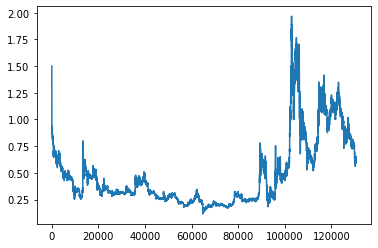

In [193]:
openPrice = float_data[:,1]
plt.plot( range ( len (openPrice) ) , openPrice )

<Strong> Plot of the first 120 hours on launch on Binance.</Strong>

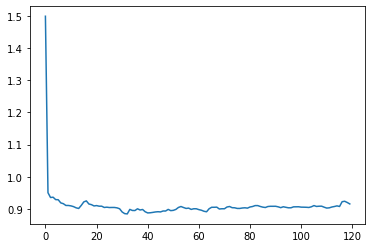

In [194]:
plt.plot(range(120) , openPrice[:120])

<Strong> </Strong>

<Strong> Breaking off into Training , Validation and Test sets. <Strong>

In [195]:
array = df.to_numpy()[:,1:]

In [196]:
training = array[:91000]
validation = array[91000:117000]
test = array[117000:]

<Strong> Creating The Prediction and Actual Target Values From Validation Set.</Strong>

<p> 
We have to move the target numpy array up one , as the result is the prediction for the timeseries (n+1) . Ex(If price is going up today and we predict it will go up tomorrow , result is found out tomorrow).
    
We have to delete the the first and last index of actual_targets , as this would be the same as shifting the whole array up one. 

The reason for deleting the last column in validation_prediction is because we cannot get the actual value (tomorrow) for a prediction we made today .
</p>

In [197]:
#Taking the last one off prediction for ^ reason
validation_predictions = (validation[:,0] > validation[:,3])[:-1].astype(int)

#Actual targets are the timeslot after , so if 
validation_targets = (validation[:,0] > validation[:,3])[1:].astype(int)

In [198]:
def naive_method(prediction , targets):
    
    length = len(prediction)
    correct = 0
    
    for i , pred in enumerate(prediction):
        
        if pred == targets[i]:
            
            correct = correct + 1
    
    print ((correct/length) * 100 )

In [199]:
naive_method(validation_predictions, validation_targets)

48.686487941843914


<p> Out of the 25,999 examples in validation_data , we got a little over 48% correct . This is no good as we could just use a constant class prediction as below that would achieve better results. </p>

In [212]:
predict_up = validation_targets == 1 
predict_down = validation_targets == 0

percent_up = ((predict_up.sum() / len(validation_targets)) * 100)
percent_down = ((predict_down.sum()/ len(validation_targets)) * 100)

print("Model that predicts price will always go up = " + str(percent_up) + ".")
print("Model that predicts price will always go down = " + str(percent_down) + ".")

Model that predicts price will always go up = 49.282664717873764.
Model that predicts price will always go down = 50.71733528212623.
